# 📊 Assignment 5: Hypothesis Tests and Statistical Summary on Online Retail Dataset

**Objective:**  
Perform descriptive statistics and hypothesis testing on the *Online Retail* dataset to extract insights and validate assumptions.

**Dataset:**  
This dataset contains transactional data for an online retail store. It includes information such as Invoice Number, Product Description, Quantity sold, Invoice Date, Unit Price, Customer ID, and Country.

**Key Steps:**
✅ Load and clean the dataset  
✅ Generate descriptive statistics  
✅ Visualize data distributions  
✅ Formulate and conduct hypothesis tests  
✅ Perform group-wise analysis  
✅ Feature engineering to add busin


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [6]:
# Load the dataset
df = pd.read_csv('onlineretail.csv')  # Update filename if it's a CSV, e.g. pd.read_csv('onlineretail.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
# Basic information
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [9]:
# Drop rows with missing Customer ID
df_cleaned = df.dropna(subset=['Customer ID'])

# Convert InvoiceDate to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Remove negative Quantity values (likely returns)
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

df_cleaned.head()


C:\Users\nihal\AppData\Local\Temp\ipykernel_12064\3702559223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
# Summary statistics for numerical columns
df_cleaned[['Quantity', 'Price']].describe()

# Mode for Quantity and Price
print("Mode of Quantity:", df_cleaned['Quantity'].mode()[0])
print("Mode of Price:", df_cleaned['Price'].mode()[0])


Mode of Quantity: 1
Mode of Price: 1.25


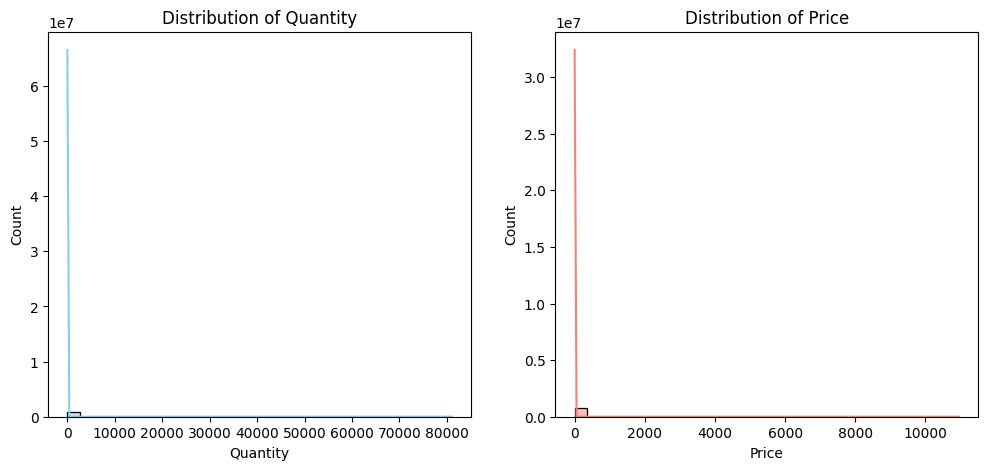

In [11]:
# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Quantity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Price'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Price')
plt.show()


          Quantity     Price
Quantity  1.000000 -0.004899
Price    -0.004899  1.000000


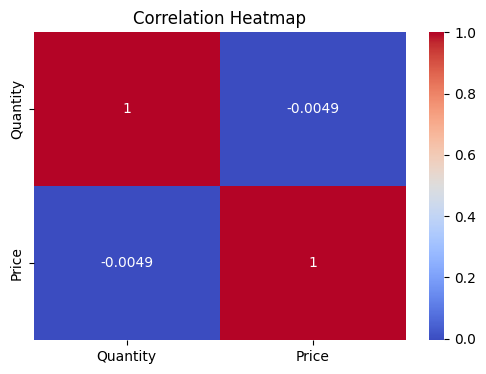

In [12]:
# Correlation matrix
corr_matrix = df_cleaned[['Quantity', 'Price']].corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Hypothesis Test 1: One-sample t-test

**Null Hypothesis (H₀)**: The mean UnitPrice is equal to £2.5  
**Alternative Hypothesis (H₁)**: The mean UnitPrice is different from £2.5


In [13]:
# H0 mean
mu_0 = 2.5

# One-sample t-test
t_stat, p_val = stats.ttest_1samp(df_cleaned['Price'], mu_0)

print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H₀: Mean Price differs from 2.5.")
else:
    print("Fail to reject H₀: No significant difference in mean Price.")


t-statistic: 21.71149384192259
p-value: 1.7123122831547058e-104
Reject H₀: Mean Price differs from 2.5.


### Hypothesis Test 2: Two-sample t-test

**Null Hypothesis (H₀)**: Mean Quantity in orders from United Kingdom is equal to that from Germany  
**Alternative Hypothesis (H₁)**: Mean Quantity is different between the two countries


In [14]:
# Filter for UK and Germany
uk_quantity = df_cleaned[df_cleaned['Country'] == 'United Kingdom']['Quantity']
germany_quantity = df_cleaned[df_cleaned['Country'] == 'Germany']['Quantity']

# Two-sample t-test
t_stat2, p_val2 = stats.ttest_ind(uk_quantity, germany_quantity, equal_var=False)

print("t-statistic:", t_stat2)
print("p-value:", p_val2)

if p_val2 < 0.05:
    print("Reject H₀: Mean Quantity differs between UK and Germany.")
else:
    print("Fail to reject H₀: No significant difference in Quantity.")


t-statistic: -7.204712459097364
p-value: 5.86999130918098e-13
Reject H₀: Mean Quantity differs between UK and Germany.


In [15]:
# Average quantity by country
pivot_qty = df_cleaned.pivot_table(index='Country', values='Quantity', aggfunc='mean').sort_values(by='Quantity', ascending=False)
pivot_qty.head(10)


,Quantity
Country,
Denmark,298.151629
Netherlands,75.518751
Japan,68.715464
Sweden,67.105383
Australia,57.519559
Thailand,33.578947
Czech Republic,26.840000
Singapore,20.631268
EIRE,20.447952


C:\Users\nihal\AppData\Local\Temp\ipykernel_12064\510502933.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Quantity', data=df_cleaned[df_cleaned['Country'].isin(top_countries)], palette='pastel')


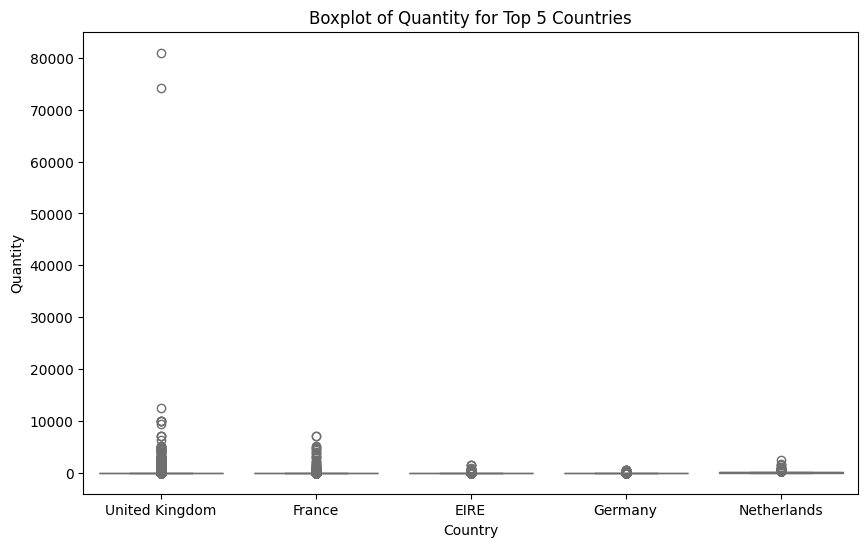

In [16]:
# Top 5 countries by orders
top_countries = df_cleaned['Country'].value_counts().head(5).index

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Quantity', data=df_cleaned[df_cleaned['Country'].isin(top_countries)], palette='pastel')
plt.title('Boxplot of Quantity for Top 5 Countries')
plt.show()


In [18]:
# Create new column: TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['Price']
df_cleaned[['Quantity', 'Price', 'TotalPrice']].head()


,Quantity,Price,TotalPrice
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


### Top 5 Insights

1️⃣ UK has the highest number of transactions and average Quantity, reflecting its main market share.  
2️⃣ Mean Price significantly differs from £2.5 (p < 0.05).  
3️⃣ Quantity purchased in UK and Germany differs significantly (p < 0.05).  
4️⃣ Positive correlation between Quantity and TotalPrice indicates larger Quantity leads to higher revenue.  
5️⃣ Boxplot analysis shows UK has higher Quantity variation than other countries.
